## **London Weather Prediction**

#### **Dataset Explanation**

##### Context
The dataset below was created by reconciling measurements from individual weather attribute requests provided by the European Climate Assessment (ECA). These measurements were recorded by a weather station near Heathrow Airport in London, UK.

This weather dataset pairs well with the **London Energy Dataset**. By joining both datasets on the `date` attribute (after preprocessing), you can perform interesting analyses on how weather impacts energy consumption in London.

##### Content
The dataset, **london_weather.csv**, contains **15,341 observations** and **10 attributes**. Below is a description of each attribute:

- **`date`**: Recorded date of measurement (int)
- **`cloud_cover`**: Cloud cover measurement in oktas (float)
- **`sunshine`**: Sunshine measurement in hours (hrs) (float)
- **`global_radiation`**: Irradiance measurement in Watt per square meter (W/m²) (float)
- **`max_temp`**: Maximum temperature recorded in degrees Celsius (°C) (float)
- **`mean_temp`**: Mean temperature in degrees Celsius (°C) (float)
- **`min_temp`**: Minimum temperature recorded in degrees Celsius (°C) (float)
- **`precipitation`**: Precipitation measurement in millimeters (mm) (float)
- **`pressure`**: Pressure measurement in Pascals (Pa) (float)
- **`snow_depth`**: Snow depth measurement in centimeters (cm) (float)

##### Source
[Weather Data on Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data/data)

---

#### **Prediction**

Prediction is performed using **Linear Regression**.


In [1]:
# Import Statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from xgboost import XGBRegressor

In [2]:
# Load Dataset
df=pd.read_csv("london_weather.csv")
df = df.drop(columns=['date'])
df.head

<bound method NDFrame.head of       cloud_cover  sunshine  global_radiation  max_temp  mean_temp  min_temp  \
0             7.0       0.4              18.0      10.8        7.0       4.9   
1             7.0       0.7              20.0      11.5        7.9       5.0   
2             8.0       0.0              13.0       9.5        9.4       7.2   
3             5.0       2.9              34.0      11.0        7.0       4.4   
4             5.0       1.3              25.0      10.8        6.4       1.9   
...           ...       ...               ...       ...        ...       ...   
7666          1.0       0.9              32.0       7.5        7.5       7.6   
7667          7.0       3.7              38.0       3.6        1.1      -1.3   
7668          7.0       0.0              21.0       4.1        2.6       1.1   
7669          6.0       0.4              22.0       5.6        2.7      -0.1   
7670          7.0       1.3              34.0       1.5       -0.8      -3.1   

      pre

In [3]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
1,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
3,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
4,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...
7666,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
7667,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
7668,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
7669,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       7666 non-null   float64
 1   sunshine          7671 non-null   float64
 2   global_radiation  7665 non-null   float64
 3   max_temp          7665 non-null   float64
 4   mean_temp         7635 non-null   float64
 5   min_temp          7669 non-null   float64
 6   precipitation     7665 non-null   float64
 7   pressure          7668 non-null   float64
 8   snow_depth        6230 non-null   float64
dtypes: float64(9)
memory usage: 539.5 KB


In [5]:
# Check Duplicates
df.duplicated().sum()

0

In [6]:
# Check Null Values
df.isna().sum()

cloud_cover            5
sunshine               0
global_radiation       6
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               3
snow_depth          1441
dtype: int64

In [7]:
# Remove Null with Mean of Each Columns
df["cloud_cover"]=df["cloud_cover"].fillna(df["cloud_cover"].mean())
df["global_radiation"]=df["global_radiation"].fillna(df["global_radiation"].mean())
df["max_temp"]=df["max_temp"].fillna(df["max_temp"].mean())
df["mean_temp"]=df["mean_temp"].fillna(df["mean_temp"].mean())
df["min_temp"]=df["min_temp"].fillna(df["min_temp"].mean())
df["precipitation"]=df["precipitation"].fillna(df["precipitation"].mean())
df["snow_depth"]=df["snow_depth"].fillna(df["snow_depth"].mean())
df["pressure"]=df["pressure"].fillna(df["pressure"].mean())

In [8]:
# Rechecking Null Values
df.isna().sum()

cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

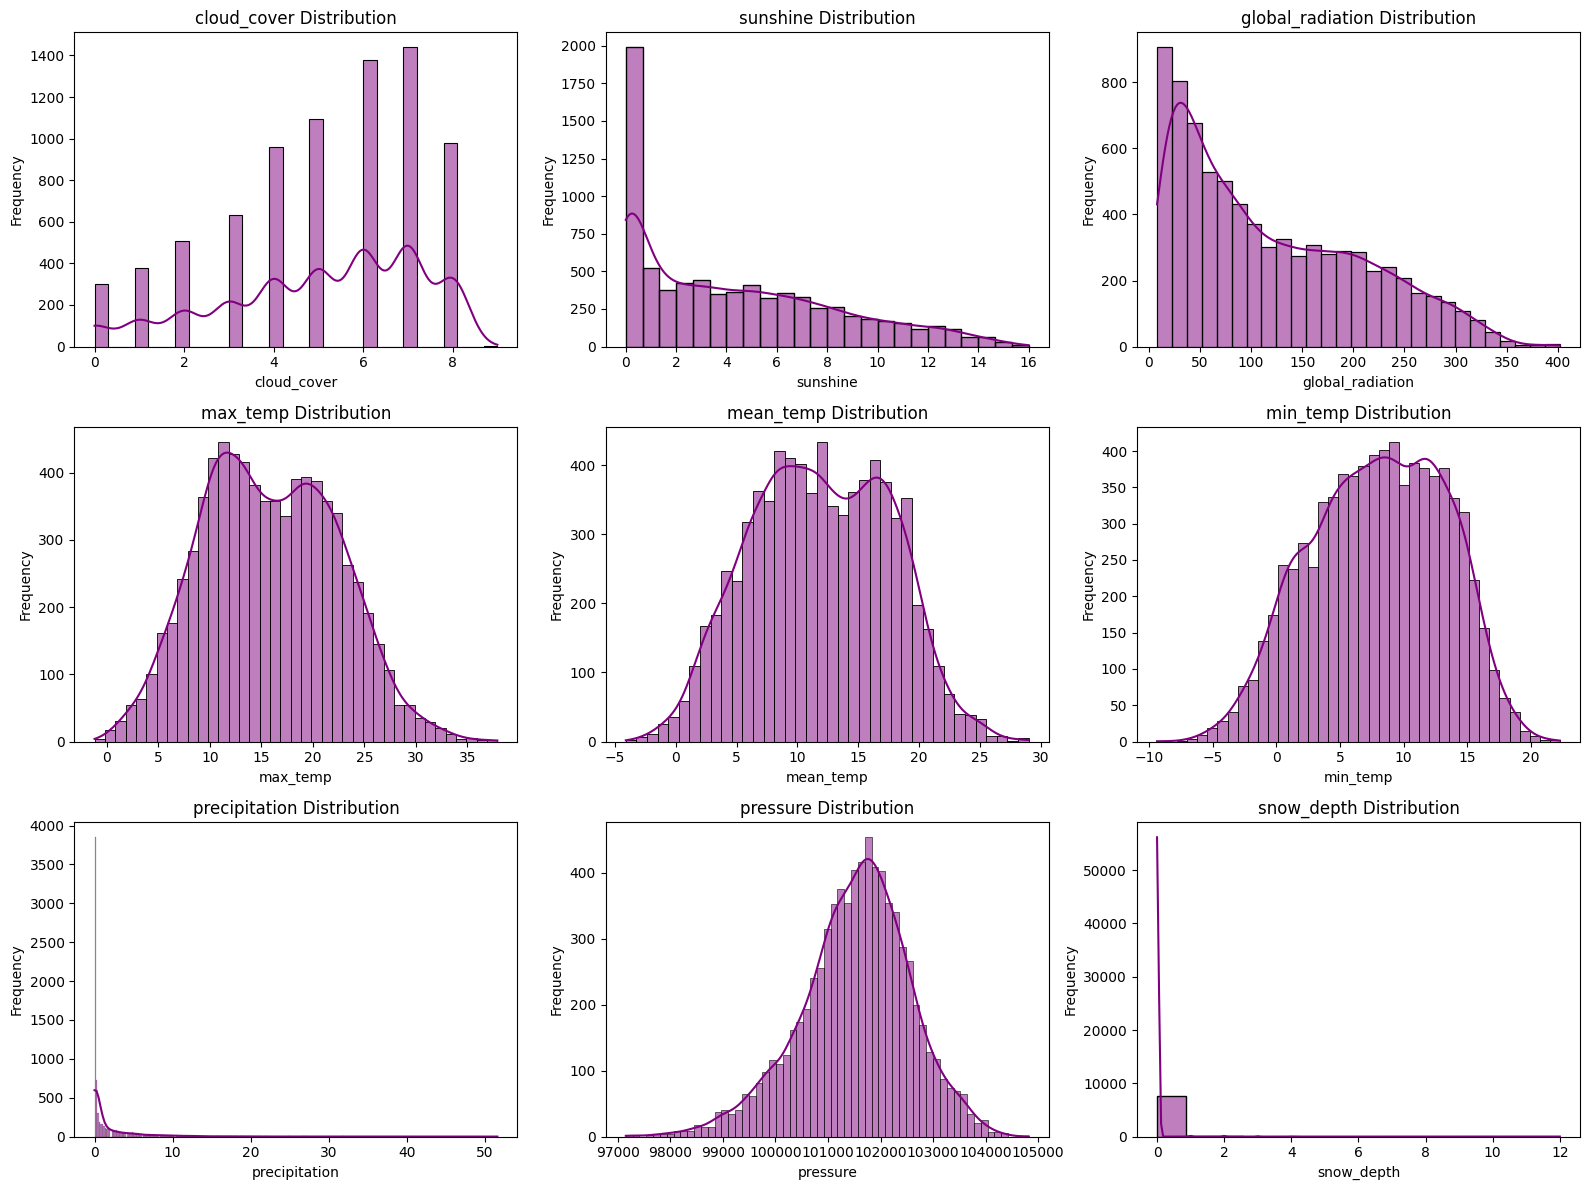

In [9]:
# Frequency Distributions

plt.figure(figsize=(16,12))

# Loop through each column to create histogram for each one
for i, column in enumerate(df.columns):
    if column != 'date':  # Skip 'date' column
        plt.subplot(3, 3, i+1)  # Adjust rows and columns for grid layout
        sns.histplot(df[column], color="purple", kde=True)  # kde=True adds a kernel density estimate
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')

# Menampilkan plot
plt.tight_layout()
plt.show()


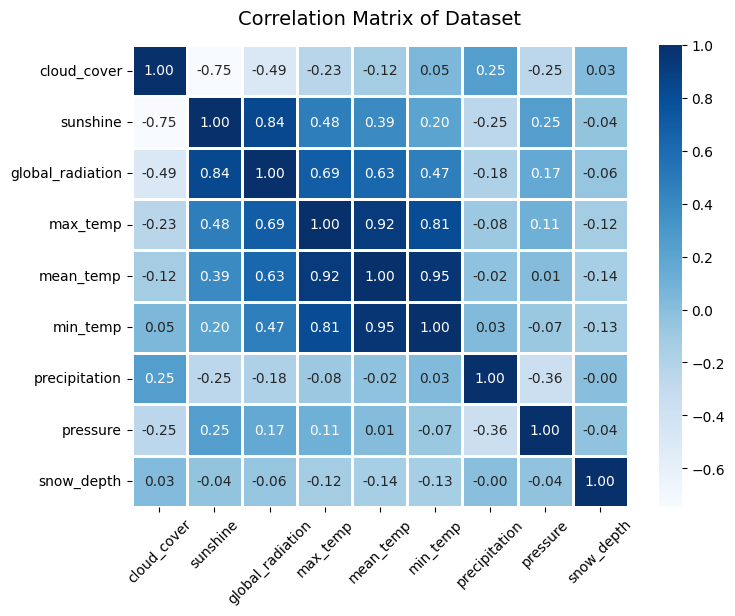

In [10]:
# Correlation Matrix
plt.figure(figsize=(8,6))

# Heatmap with correlation matrix
cm = df.corr()
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", linewidths=1)
plt.title("Correlation Matrix of Dataset", fontsize=14, pad=15)
plt.xticks(rotation=45)

# Plot
plt.show()


In [11]:
# Splitting X feature and y target
X=df.drop(columns=["cloud_cover", "precipitation", "pressure", "snow_depth", "global_radiation"], axis=1)
y=df["global_radiation"]

In [12]:
# Splitting train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [13]:
X_train.shape

(6136, 4)

In [14]:
X_test.shape

(1535, 4)

In [15]:
y_train.shape

(6136,)

In [16]:
y_test.shape

(1535,)

In [17]:
# Model Linear Regression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [18]:
# R2 Score 
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.822943720279065


In [19]:
# Random Forest Regression
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [20]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.8391320571774468


In [21]:
# Using XGBOOST
model3 =XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=10, learning_rate=0.1)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

In [22]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.822074989786049


In [23]:
# Melakukan prediksi pada data training
y_train_pred = model.predict(X_train)

print("Data Training Prediction")

# Mean Squared Error (MSE) pada data training
mse_train = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error (Train):', round(mse_train, 4))

# Root Mean Squared Error (RMSE) pada data training
rmse_train = sqrt(mse_train)
print('Root Mean Squared Error (Train):', round(rmse_train, 4))

# R^2 pada data training
r2_train = model.score(X_train, y_train)
print('R² (Train):', round(r2_train, 4))

Data Training Prediction
Mean Squared Error (Train): 184.3261
Root Mean Squared Error (Train): 13.5767
R² (Train): 0.9763


In [24]:
# Melakukan prediksi pada data testing
y_test_pred = model.predict(X_test)

print("Data Testing Prediction")

# Mean Squared Error (MSE) pada data testing
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Test):', round(mse_test, 4))

# Root Mean Squared Error (RMSE) pada data testing
rmse_test = sqrt(mse_test)
print('Root Mean Squared Error (Test):', round(rmse_test, 4))

# R² pada data testing
r2_test = model.score(X_test, y_test)
print('R² (Test):', round(r2_test, 4))

Data Testing Prediction
Mean Squared Error (Test): 1279.1936
Root Mean Squared Error (Test): 35.7658
R² (Test): 0.8391


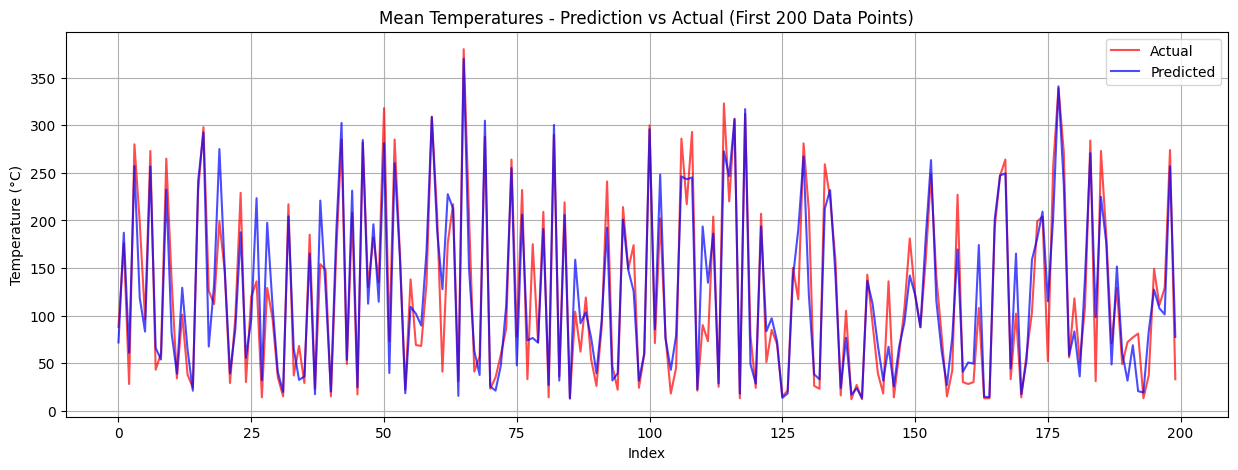

In [25]:
# Prediction Visualization
plt.figure(figsize=(15,5))

plt.plot(range(len(y_test[:200])), y_test[:200], label='Actual', color='red', alpha = 0.7)
plt.plot(range(len(y_pred[:200])), y_pred[:200], label='Predicted', color='blue', alpha = 0.7)

plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.title('Mean Temperatures - Prediction vs Actual (First 200 Data Points)')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
X.columns

Index(['sunshine', 'max_temp', 'mean_temp', 'min_temp'], dtype='object')

In [27]:
from flask import Flask, jsonify, request
from flask_cors import CORS
import joblib

app = Flask(__name__)
CORS(app)

In [29]:
@app.route('/global-radiation', methods=['POST'])
def prediction_api():
    if request.method == 'POST':
        data = request.json
        sunshine = data["sunshine"]
        max_temp = data["max_temp"]
        mean_temp = data["mean_temp"]
        min_temp = data["min_temp"]
        prediction = model.predict([[sunshine, max_temp, mean_temp, min_temp]])[0]
        
        response = jsonify({'global_radiation': prediction})
        response.headers.add('Access-Control-Allow-Origin', '*')
        return response
    else:
        return jsonify({'message': 'Method not allowed'}), 405
    
app.run(host='localhost', port=5000)
app.run(debug=True)

AssertionError: View function mapping is overwriting an existing endpoint function: prediction_api